# Get Weather Demo

In [58]:
import sys
from datetime import datetime
import pandas as pd
sys.path.append('..')
from WeatherFetcher import WeatherFetcher

The WeatherFetcher class requires a pandas DataFrame object with column titles 
'Latitude', 'Longitude', and 'Vintage Year', indicating the coordinates and year 
that the originating grapes were harvested.

In this example, we are going to request historical weather data for a 2019 Napa
Valley wine (located at 38.4274 latitude, 122.3943 longitude).

In [59]:
data = pd.DataFrame(
    [[38.4274, 122.3943, 2018]],
    columns=['Latitude', 'Longitude', 'Vintage Year']
    )
data

,Latitude,Longitude,Vintage Year
0,38.4274,122.3943,2018


Here we indicate how far back our historical analysis should go.

In [60]:
start_date = datetime(1996, 1, 1)

Now we will initailize a WeatherFetcher object that will organize the requested
data

In [61]:
wf = WeatherFetcher(data = data, start_date = start_date)
wf.get_weather()
df = wf.daily_weather_data[0]

Let's look at the output

In [62]:
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1996-01-01,3.0,-3.2,6.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-02,2.3,-3.1,6.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03,-5.8,-7.1,-2.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04,0.1,-6.4,3.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,-0.8,-4.1,4.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-27,-9.8,-12.7,-9.0,0.0,NaN,4.0,15.5,NaN,1036.9,NaN
2018-12-28,-6.7,-11.8,-4.2,0.0,NaN,335.0,16.4,NaN,1038.6,NaN
2018-12-29,-6.8,-9.0,-3.0,0.0,NaN,357.0,12.8,NaN,1039.6,NaN


Let's check to see when pressure starts to be faithfully documented

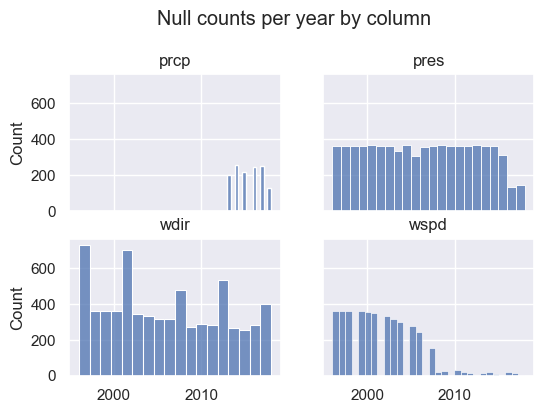

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Start a 2,2 subplot
fig, axs = plt.subplots(nrows = 2, ncols = 2, sharex='all', sharey='all')
fig.dpi = 100
fig.figsize = (4, 2) 
for i, filter in enumerate(['prcp', 'pres', 'wdir', 'wspd']):
    filtered_df = df.loc[df[filter].isna()]
    dates = filtered_df.index
    dates = dates.values.astype('datetime64[Y]').astype('int') + 1970
    ax =sns.histplot(dates, ax = axs[int(math.floor(i/2)), i % 2])
    ax.set_title(filter)
title = fig.suptitle('Null counts per year by column', y = 1.04)

Loooks like the data doesn't capture certain columns faithfully until 2016. This
will have to be considered, or transformations will neede to be made.